In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    matthews_corrcoef,
    precision_score,
    recall_score,
)

# Loading the dataset
df = pd.read_csv('creditcard.csv')

# Displaying the first few rows of the dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In this section, we explore the dataset, including its shape and summary statistics.


In [2]:
# Exploratory Data Analysis

# Dataset shape and summary statistics
print(f"Dataset shape: {df.shape}")
df.describe()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Separating fraudulent and valid transactions

Here, we identify and separate fraudulent and valid transactions, calculating the outlier fraction.


In [3]:
# Separating fraudulent and valid transactions
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))

print(f"Outlier Fraction: {outlier_fraction}")
print(f"Fraud Cases: {len(fraud)}")
print(f"Valid Transactions: {len(valid)}")


Outlier Fraction: 0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


## Checking for missing values

We examine and report any missing values in the dataset.


In [4]:
# Checking for missing values
missing_values = pd.concat([df.isnull().sum(), (df.isnull().sum() / len(df)) * 100],
                           axis=1, keys=['Total', 'Percent'])
missing_values.transpose()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploring Amount details of fraudulent transactions

Here, we analyze the amount details of fraudulent transactions.


In [5]:
# Exploring Amount details of fraudulent transactions
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Exploring Amount details of valid transactions

We also explore the amount details of valid transactions.


In [6]:
# Exploring Amount details of valid transactions
print("Details of valid transactions")
valid.Amount.describe()


Details of valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Correlation heatmap

In this section, we create a correlation heatmap to visualize relationships between features.


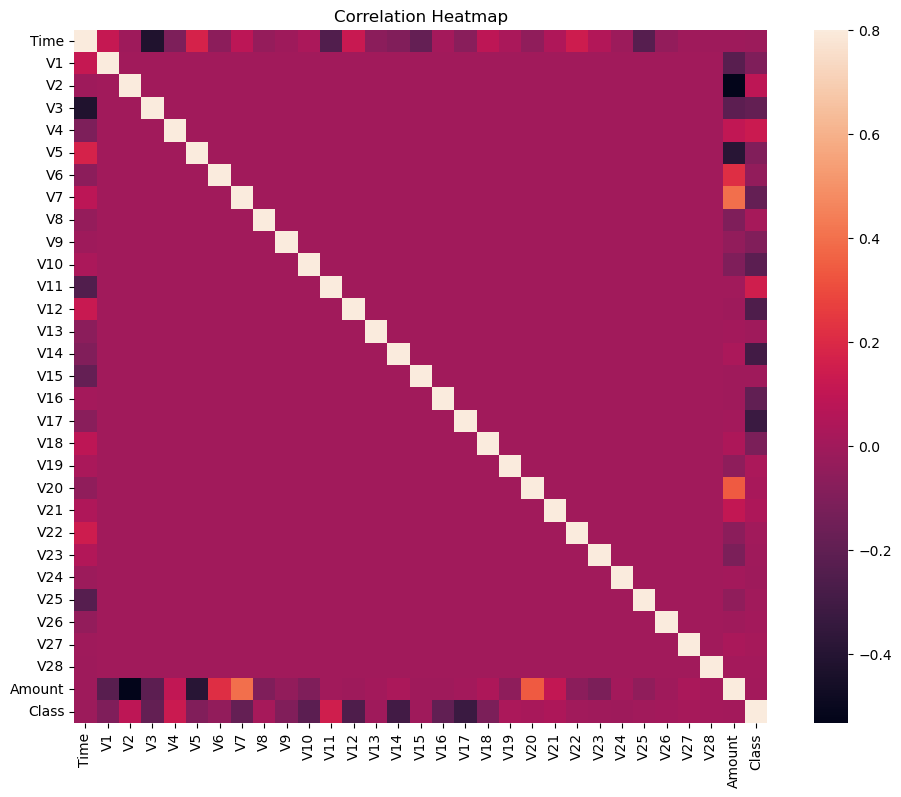

In [7]:
# Correlation heatmap
corr = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corr, vmax=0.8, square=True)
plt.title("Correlation Heatmap")
plt.show()


## Preparing data for modeling

We prepare the data for modeling by separating features (X) and target variable (y).


In [8]:
# Preparing data for modeling
X = df.drop(['Class'], axis=1)
y = df['Class']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (284807, 30)
y shape: (284807,)


## Splitting the data into training and testing sets

In this section, we split the data into training and testing sets for model evaluation.


In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building and training the RandomForestClassifier model

Here, we build and train a Random Forest Classifier model using the training data.


In [ ]:
# Building and training the RandomForestClassifier model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)


## Making predictions on the test set

We use the trained model to make predictions on the test set.


In [ ]:
# Making predictions on the test set
y_pred = rfc_model.predict(X_test)


## Evaluating the model

We evaluate the model's performance using various metrics.


In [ ]:
# Evaluating the model
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()

print("Model Evaluation:")
print("The model used is Random Forest classifier")
print(f"The accuracy is {accuracy_score(y_test, y_pred)}")
print(f"The precision is {precision_score(y_test, y_pred)}")
print(f"The recall is {recall_score(y_test, y_pred)}")
print(f"The F1-Score is {f1_score(y_test, y_pred)}")
print(f"The Matthews correlation coefficient is {matthews_corrcoef(y_test, y_pred)}")


## Visualizing the confusion matrix

We visualize the confusion matrix to assess the model's performance.


In [ ]:
# Visualizing the confusion matrix
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
